**Regression Challenge**

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.


> Citation: The data used in this exercise originates from the following study:

>Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.
It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml) . 
> Irvine, CA: University of California, School of Information and Computer Science).i

In [1]:
import pandas as pd

#load the training dataset
url= "https://raw.githubusercontent.com/MicrosoftDocs/ml-basics/master/challenges/data/real_estate.csv"
realestate_data= pd.read_csv(url)
realestate_data.head()


,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

* transaction_date - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* house_age - the house age (in years)
* transit_distance - the distance to the nearest light rail station (in meters)
* local_convenience_stores - the number of convenience stores within walking distance
* latitude - the geographic coordinate, latitude
* longitude - the geographic coordinate, longitude
* price_per_unit house price of unit area (3.3 square meters)


**Train a Regression Model**

Your challenge is to explore and prepare the data, identify predictive features that will help predict the price_per_unit label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than 7) when evaluated against a test subset of data.

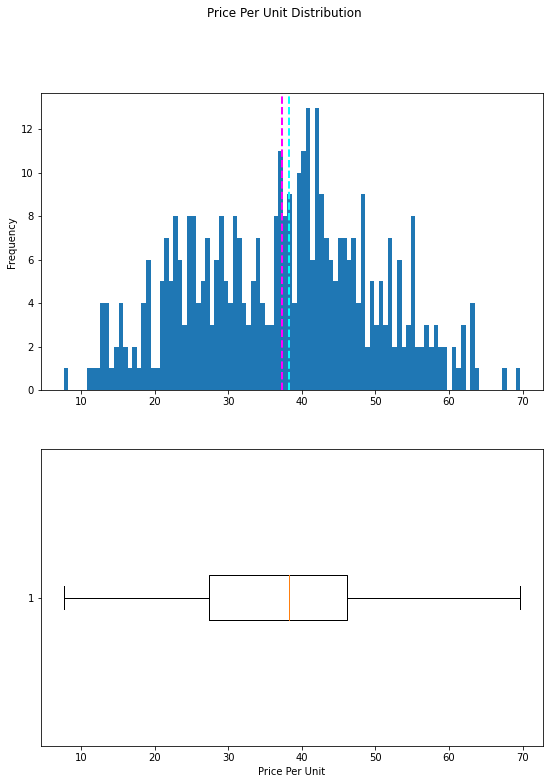

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
realestate_data = realestate_data[realestate_data['price_per_unit'] <75]
label = realestate_data['price_per_unit']

fig, ax= plt.subplots(2,1,figsize= (9,12))

ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Price Per Unit')

fig.suptitle('Price Per Unit Distribution')
fig.show()

**View Numeric Correlations**


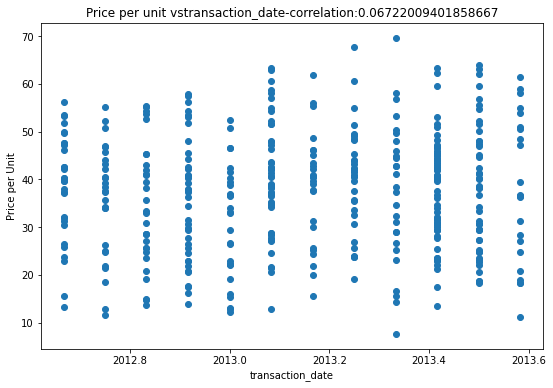

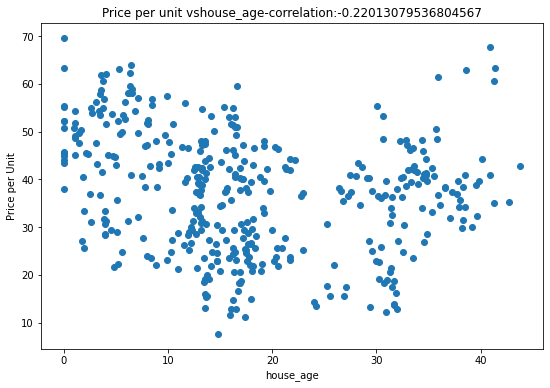

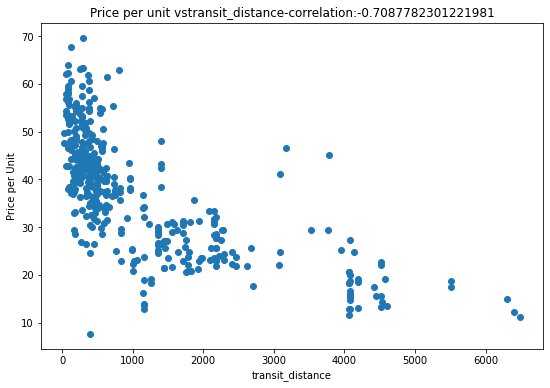

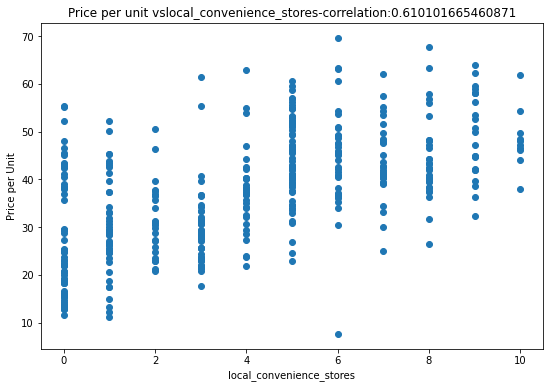

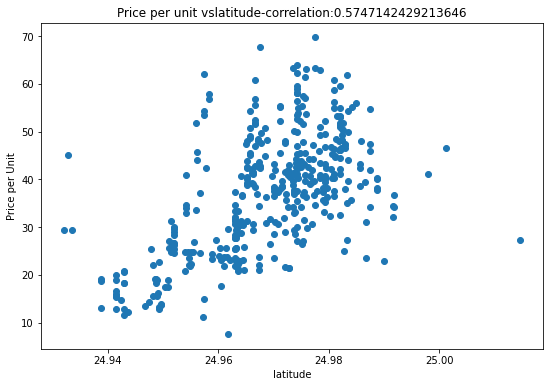

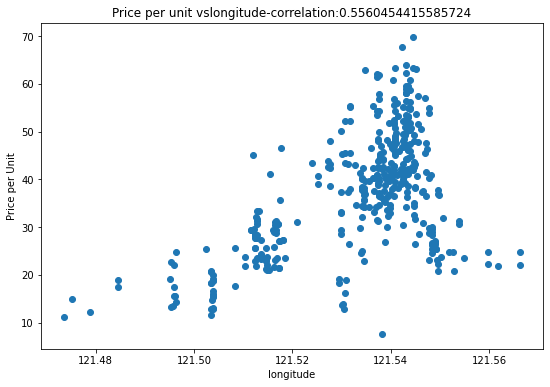

In [16]:
numeric= realestate_data[realestate_data.columns[0:-1]]
for col in numeric:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  feature = realestate_data[col]
  label = realestate_data['price_per_unit']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price per Unit')
  ax.set_title('Price per unit vs' + col +'-correlation:' + str(correlation))
plt.show()



**Train Regression Model**

Seperate features and labels and split data for training and validation

In [17]:
X, y = realestate_data[realestate_data.columns[1:-1]].values, realestate_data['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')


Features:
[[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows'% (X_train.shape[0], X_test.shape[0]))

Training Set: 285 rows
Test Set: 123 rows


**Preprocess using pipeline**
using Gradient Boosting Regressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', GradientBoostingRegressor())])
MSE: 38.42476699129488
RMSE: 6.198771409827506
R2: 0.6721197276472963


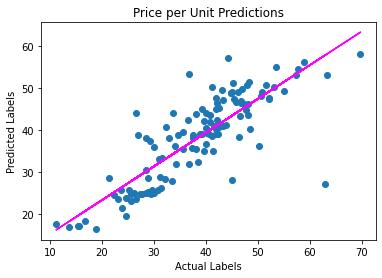

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

numeric_features= [0,1,3,4]
numeric_transformer= Pipeline (steps=[
                                      ('scaler', StandardScaler())])

preprocessor= ColumnTransformer(
    transformers=[
                 ('num', numeric_transformer, numeric_features),])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])

model= pipeline.fit(X_train, (y_train))
print(model)

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Price per Unit Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


**The lowest Root Mean Square Error (RMSE) is 6.19, which mean the RMSE <7**

**Use the Trained Model**


In [26]:
import joblib

filename = '.realestate_model.pkl'
joblib.dump(model, filename)

['.realestate_model.pkl']

In [28]:
loaded_model= joblib.load(filename)

#an array of features for each transaction (include house_age, transi_distance, local_conveince_stores, latitude, longtitude)

X_new= np.array([[16.2,	289.3248,	5,	24.98203,	121.54348],
                 [13.6,	4082.015,	0,	24.94155,	121.50381]])

results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
49.3
17.05
